In [2]:
import pandas as pd
link='https://raw.githubusercontent.com/maomaohenmao/data/master/small_donations_data.csv'
donor = pd.read_csv(link)

In [3]:
donor.head()

,id,report_number,origin,filer_id,type,filer_name,first_name,middle_initial,last_name,office,...,contributor_address,contributor_city,contributor_state,contributor_zip,contributor_occupation,contributor_employer_name,contributor_employer_city,contributor_employer_state,url,contributor_location
0,4924154.rcpt,100670216,C3,MACED 592,Candidate,MACEWEN DREW C,DREW,C,MACEWEN,STATE REPRESENTATIVE,...,410 E PICKERING RD.,SHELTON,WA,98584,NaN,NaN,NaN,NaN,View report (http://web.pdc.wa.gov/rptimg/defa...,"(47.27572, -122.96448)"
1,5265339.rcpt,100722381,C3,APPLS 370,Candidate,APPLETON SHERRY V,SHERRY,V,APPLETON,STATE REPRESENTATIVE,...,"1155 N STATE ST., SUITE 316",BELLINGHAM,WA,98225,NaN,NaN,NaN,NaN,View report (http://web.pdc.wa.gov/rptimg/defa...,"(48.74694, -122.47985)"
2,4476891.rcpt,100596549,C3,JUSTFA 507,Political Committee,WA ST ASSN FOR JUSTICE JUSTICE FOR ALL,NaN,NaN,WA ST ASSN FOR JUSTICE JUSTICE FOR ALL,NaN,...,1030 N CENTER PKWY #208,KENNEWICK,WA,99336,ATTORNEY,"GIERTH-EDDY LAW OFFICES, PLLC",KENNEWICK,WA,View report (http://web.pdc.wa.gov/rptimg/defa...,"(46.2216, -119.23016)"
3,4567569.rcpt,100612601,C3,WASHCV 145,Political Committee,WA CONSERVATION VOTERS ACTION FUND,NaN,NaN,WA CONSERVATION VOTERS ACTION FUND,NaN,...,2607 WESTERN AVE #601,SEATTLE,WA,98121,NaN,NaN,NaN,NaN,View report (http://web.pdc.wa.gov/rptimg/defa...,"(47.61462, -122.35099)"
4,2997493.rcpt,100380393,C4,BUNKR2 391,Candidate,BUNK RAYMOND R III,RAYMOND,R,BUNK,STATE SENATOR,...,20825 STATE ROUTE 410 EAST #416,BONNEY LAKE,WA,98391,LAW ENFORCEMENT OFFICER,FEDERAL WAY POLICE DEPARTMENT,FEDERAL WAY,WA,View report (http://web.pdc.wa.gov/rptimg/defa...,"(47.17704, -122.1865)"


In [3]:
donor.dtypes

id                             object
report_number                   int64
origin                         object
filer_id                       object
type                           object
filer_name                     object
first_name                     object
middle_initial                 object
last_name                      object
office                         object
legislative_district          float64
position                       object
party                          object
ballot_number                 float64
for_or_against                 object
jurisdiction                   object
jurisdiction_county            object
jurisdiction_type              object
election_year                   int64
amount                        float64
cash_or_in_kind                object
receipt_date                   object
description                    object
memo                           object
primary_general                object
code                           object
contributor_

In [4]:
donor['amount'].describe()

count      9491.000000
mean        255.749095
std        2957.761253
min           0.000000
25%          10.000000
50%          35.000000
75%         100.000000
max      122649.590000
Name: amount, dtype: float64

In [5]:
donor['amount'].skew()

28.830049197495612

In [6]:
donor['amount'].kurt()

937.07852125065983

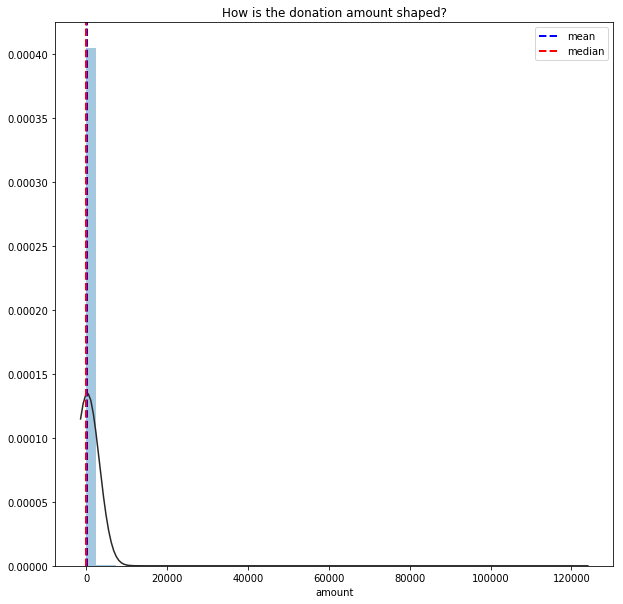

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

mnVar=donor['amount'].mean()
mdVar=donor['amount'].median()
plt.figure(figsize=(10,10))
sns.distplot(donor['amount'].dropna(),kde=False,fit=norm)
plt.title('How is the donation amount shaped?')
plt.axvline(mnVar, color='b', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(mdVar, color='r', linestyle='dashed', linewidth=2,label='median')
plt.legend()
plt.show()

In [8]:
donor['contributor_city']= donor['contributor_city'].astype('category')

In [9]:
donor['contributor_city'].dtypes

CategoricalDtype(categories=['ABERDEEN', 'ACME', 'ADDY', 'AIRWAY HEIGHTS', 'ALBUQUERQUE',
                  'ALEXANDRIA', 'ALGONA', 'ALLYN', 'ALMIRA', 'AMBLER',
                  ...
                  'WOODINVILLE', 'WOODLAND', 'WOODSIDE', 'WOODWAY', 'YACOLT',
                  'YAKIMA', 'YARDLEY', 'YARROW POINT', 'YELM', 'ZILLAH'],
                 ordered=False)

In [10]:
donor['contributor_city'].describe()

count        9491
unique        718
top       SEATTLE
freq         1790
Name: contributor_city, dtype: object

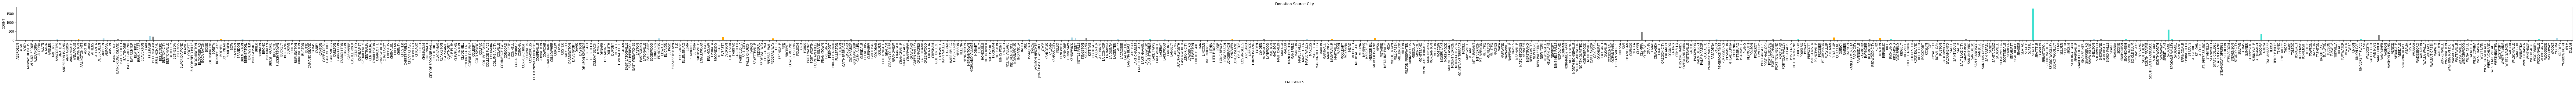

In [11]:
%matplotlib inline
plt.figure(figsize=(150,2))
newerPalette=['grey']*3 + ['orange']*3 + ['turquoise']*3 + ['lightblue']*3
donor['contributor_city'].value_counts(sort=False).plot.bar(color=newerPalette, title="Donation Source City")
plt.ylabel('COUNT')
plt.xlabel('CATEGORIES')
plt.show()

In [12]:
donor['party'].dtypes

dtype('O')

In [13]:
donor['party']= donor['party'].astype('category')

In [14]:
donor['party'].describe()

count         3680
unique           6
top       DEMOCRAT
freq          1366
Name: party, dtype: object

In [15]:
donor['party'].value_counts()

DEMOCRAT        1366
REPUBLICAN      1148
NON PARTISAN    1090
OTHER             38
NONE              35
INDEPENDENT        3
Name: party, dtype: int64

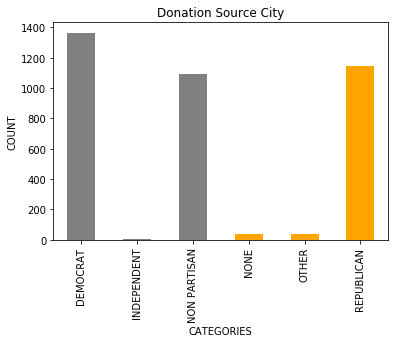

In [16]:
%matplotlib inline
newerPalette=['grey']*3 + ['orange']*3 + ['turquoise']*3 + ['lightblue']*3
donor['party'].value_counts(sort=False).plot.bar(color=newerPalette, title="Donation Source City")
plt.ylabel('COUNT')
plt.xlabel('CATEGORIES')
plt.show()

In [17]:
byeCategories=['NONE']
donorDRI=donor[~donor.party.isin(byeCategories)].copy()

In [22]:
donorDRI.head()

,id,report_number,origin,filer_id,type,filer_name,first_name,middle_initial,last_name,office,...,contributor_address,contributor_city,contributor_state,contributor_zip,contributor_occupation,contributor_employer_name,contributor_employer_city,contributor_employer_state,url,contributor_location
0,4924154.rcpt,100670216,C3,MACED 592,Candidate,MACEWEN DREW C,DREW,C,MACEWEN,STATE REPRESENTATIVE,...,410 E PICKERING RD.,SHELTON,WA,98584,NaN,NaN,NaN,NaN,View report (http://web.pdc.wa.gov/rptimg/defa...,"(47.27572, -122.96448)"
1,5265339.rcpt,100722381,C3,APPLS 370,Candidate,APPLETON SHERRY V,SHERRY,V,APPLETON,STATE REPRESENTATIVE,...,"1155 N STATE ST., SUITE 316",BELLINGHAM,WA,98225,NaN,NaN,NaN,NaN,View report (http://web.pdc.wa.gov/rptimg/defa...,"(48.74694, -122.47985)"
2,4476891.rcpt,100596549,C3,JUSTFA 507,Political Committee,WA ST ASSN FOR JUSTICE JUSTICE FOR ALL,NaN,NaN,WA ST ASSN FOR JUSTICE JUSTICE FOR ALL,NaN,...,1030 N CENTER PKWY #208,KENNEWICK,WA,99336,ATTORNEY,"GIERTH-EDDY LAW OFFICES, PLLC",KENNEWICK,WA,View report (http://web.pdc.wa.gov/rptimg/defa...,"(46.2216, -119.23016)"
3,4567569.rcpt,100612601,C3,WASHCV 145,Political Committee,WA CONSERVATION VOTERS ACTION FUND,NaN,NaN,WA CONSERVATION VOTERS ACTION FUND,NaN,...,2607 WESTERN AVE #601,SEATTLE,WA,98121,NaN,NaN,NaN,NaN,View report (http://web.pdc.wa.gov/rptimg/defa...,"(47.61462, -122.35099)"
4,2997493.rcpt,100380393,C4,BUNKR2 391,Candidate,BUNK RAYMOND R III,RAYMOND,R,BUNK,STATE SENATOR,...,20825 STATE ROUTE 410 EAST #416,BONNEY LAKE,WA,98391,LAW ENFORCEMENT OFFICER,FEDERAL WAY POLICE DEPARTMENT,FEDERAL WAY,WA,View report (http://web.pdc.wa.gov/rptimg/defa...,"(47.17704, -122.1865)"


In [18]:
pd.pivot_table(donorDRI, values='amount',index='contributor_city',columns='party', aggfunc='mean')

party,DEMOCRAT,INDEPENDENT,NON PARTISAN,OTHER,REPUBLICAN
contributor_city,,,,,
ABERDEEN,800.000000,NaN,100.000000,NaN,250.000000
ACME,25.000000,NaN,NaN,NaN,NaN
ADDY,NaN,NaN,NaN,NaN,NaN
AIRWAY HEIGHTS,NaN,NaN,800.000000,NaN,35.000000
ALBUQUERQUE,NaN,NaN,400.000000,NaN,NaN
ALEXANDRIA,NaN,NaN,NaN,NaN,NaN
ALGONA,NaN,NaN,NaN,NaN,NaN
ALLYN,50.000000,NaN,NaN,NaN,100.000000
ALMIRA,NaN,NaN,NaN,NaN,1000.000000


In [42]:
seattle = donorDRI[(donorDRI.contributor_city=='SEATTLE')]

C:\Users\win\Documents\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


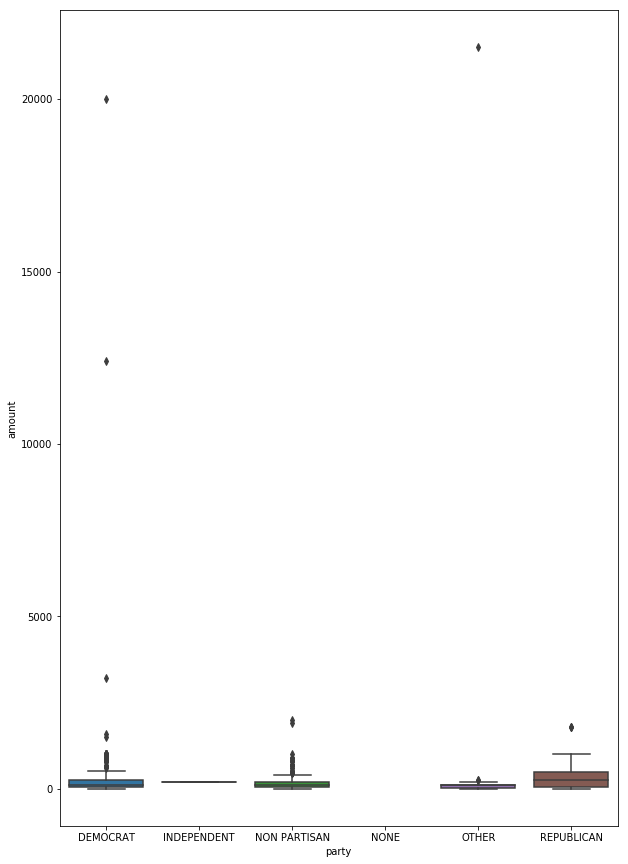

In [43]:
plt.figure(figsize=(10,15))
sns.boxplot(x="party", y="amount", data=seattle)

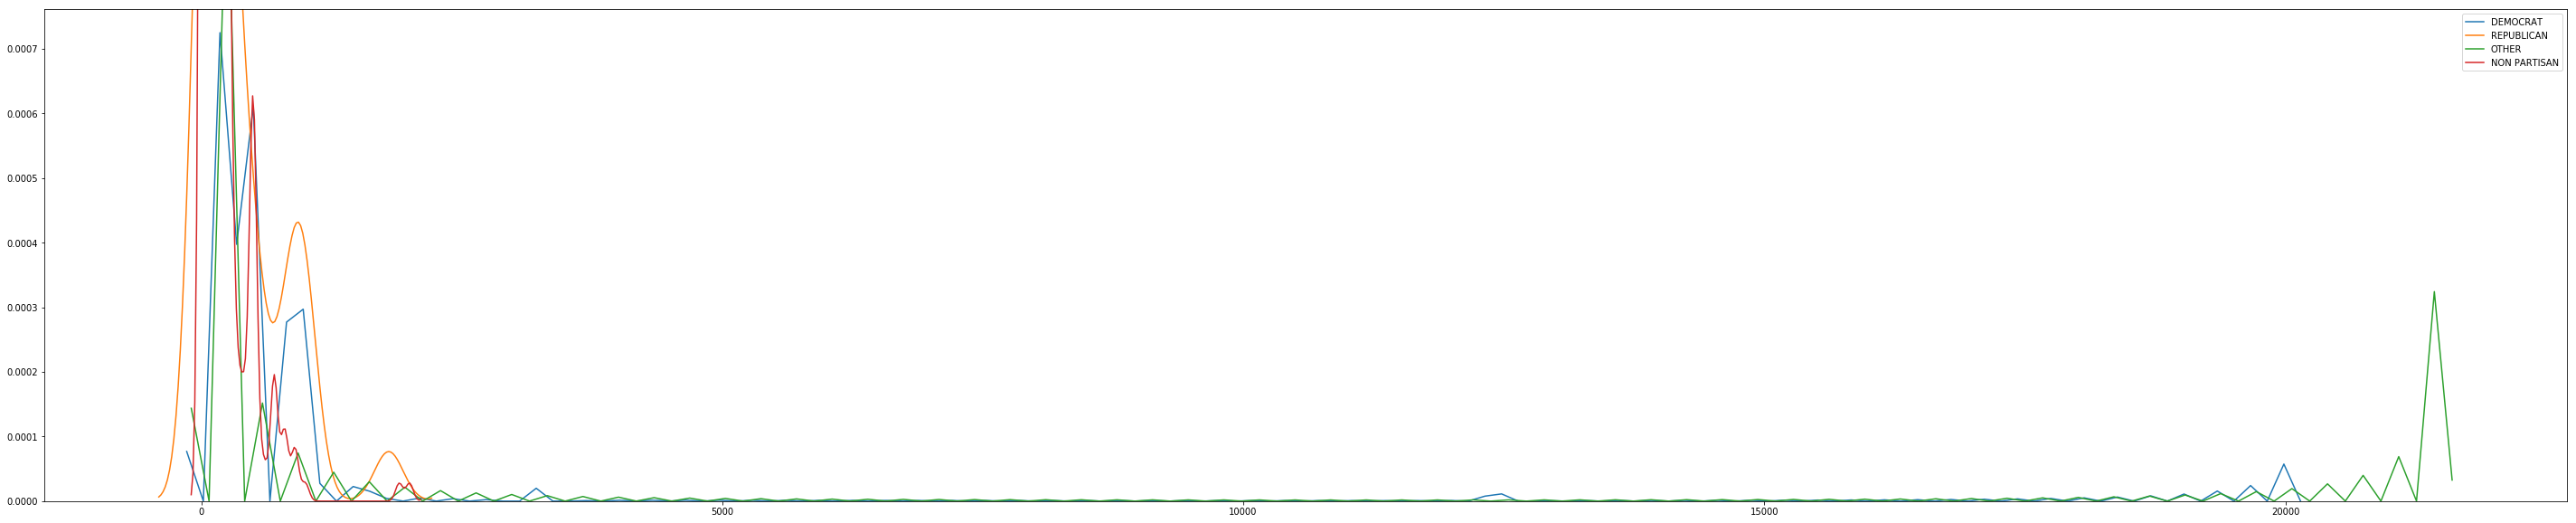

In [21]:
plt.figure(figsize=(50,10))
sns.kdeplot(seattle[seattle.party=='DEMOCRAT'].amount, label="DEMOCRAT")
sns.kdeplot(seattle[seattle.party=='REPUBLICAN'].amount, label="REPUBLICAN")
sns.kdeplot(seattle[seattle.party=='OTHER'].amount, label="OTHER")
sns.kdeplot(seattle[seattle.party=='NON PARTISAN'].amount, label="NON PARTISAN")
plt.legend();

In [29]:
donorDRI.columns.get_loc("amount")

19

In [30]:
donorDRI.columns.get_loc("party")

12

In [51]:
donorDRI.columns.get_loc("type")

4

In [52]:
donorDRI.dropna(inplace=True)

In [57]:
from statsmodels.robust.robust_linear_model import RLM

formula='amount ~ C(party, Treatment("INDEPENDENT"))+ C(type, Treatment("Political Committee"))'
LinRegR_catX = RLM.from_formula(formula, donor).fit()
print(LinRegR_catX.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 amount   No. Observations:                 3680
Model:                            RLM   Df Residuals:                     3674
Method:                          IRLS   Df Model:                            5
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 01 Feb 2018                                         
Time:                        09:52:52                                         
No. Iterations:                    19                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [56]:
pd.concat({'Coefficients':LinRegR_catX.params,
           'Significant?':LinRegR_catX.pvalues<0.05},axis=1)

,Coefficients,Significant?
Intercept,77.833333,True
"C(party, Treatment(""INDEPENDENT""))[T.DEMOCRAT]",-35.920654,False
"C(party, Treatment(""INDEPENDENT""))[T.NON PARTISAN]",-35.442751,False
"C(party, Treatment(""INDEPENDENT""))[T.NONE]",-20.353085,False
"C(party, Treatment(""INDEPENDENT""))[T.OTHER]",-58.916825,False
"C(party, Treatment(""INDEPENDENT""))[T.REPUBLICAN]",-31.364003,False
"C(type, Treatment(""Political Committee""))[T.Candidate]",77.833333,True
